# Wild fires  

This jupyter book examines the exported databricks data from MS-SQL. It can edit, manipulate and, most importantly, examine them.

info:
loehnertz@space4environment.com

## (0) Connect to JEDI - AZURE ( in the Moment running wiht FME)  -- under construction

In [3]:
##https://stackoverflow.com/questions/65649972/azure-python-download-storage-blob-returns-the-condition-specified-using-http-c
##https://learn.microsoft.com/en-us/azure/storage/blobs/storage-blob-download-python


jedi_dim =r"https://cwsblobstorage01.blob.core.windows.net/cwsblob01/ExportTable/wildfires/wildfires_ctable_v4/part-00000-tid-1223419340435827572-52b7c921-64fe-406c-8a0c-18b9fa6d9a5f-975-1-c000.csv.gz"




## (1) Connect to data from MS-SQL ONAGER server - [ETC_ULS_Sandbox]

The following box connect to MS-SQL ONAGER server 

In [2]:
import pyodbc 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Some other example server values are
conn = pyodbc.connect('Driver={SQL Server};'
                        'Server=ONAGER;'
                        'Database=ETC_ULS_Sandbox;'
                        'UID=user1;'
                        'PWD=uSer1Pass!;'
                        'Trusted_Connection=yes;')
#
print ("connected to ETC_ULS_Sandbox......")

connected to ETC_ULS_Sandbox......


In [ ]:

## Testing connection to GreenMonkey sever:

import pyodbc 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy as sa
from sqlalchemy import create_engine, event
from sqlalchemy.engine.url import URL

        

print ("connect to engine......")
engine = sa.create_engine('mssql+pyodbc://' + "GREENMONKEy" + '/' + "Climate_Impact" + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')

print ("connection to greenmonkey found")
print ("Reading table from greenmonkey")
query=('''

SELECT [SCHANG]
      ,[LCF3]
      ,[LCF2]
      ,[LCF1]
      ,[LCFL3]
      ,[LCFL2]
      ,[LCFL1]
      ,[CHANGE]
      ,[GRIDCODE]
      ,[CC]
      ,[GCHA]
      ,[lcf3_num]
      ,[Cng_n]
      ,[LTAKE]
      ,[INV_LTAKE]
      ,[LTAKE_ALL]
      ,[LD_code]
      ,[LD_description]
      ,[SOC_factor]
  FROM [Climate_Impact].[LUT].[LCF]
''')  
df_test = pd.read_sql(query, engine)
print(df_test.head(26))
#pivot 

print ("end.............greenmonkey")

## (2) Reading data

### (2.1) Reading the "mother" database

In [4]:
##Reading data
#cursor = cnxn.cursor()
### SQL query
print ("Reading table from ONAGER")
query=('''

SELECT [wild_fires_20002022_v4_mother].[ADM_ID]
      ,[ProtArea]
      ,[envZones]
      ,[clc0018]
      ,[GridNum10km],
         ISNULL(SUM( [y01012000]),0 ) AS [01-01-2000],
		 ISNULL(SUM( [y01022000]),0 ) AS [01-02-2000],
		ISNULL(SUM( [y01032000]),0 ) AS [01-03-2000],
		ISNULL(SUM( [y01042000]),0 ) AS [01-04-2000],
		ISNULL(SUM( [y01052000]),0 ) AS [01-05-2000],
		ISNULL(SUM( [y01062000]),0 ) AS [01-06-2000],
		ISNULL(SUM( [y01072000]),0 ) AS [01-07-2000],
		ISNULL(SUM( [y01082000]),0 ) AS [01-08-2000],
		ISNULL(SUM( [y01092000]),0 ) AS [01-09-2000],
		ISNULL(SUM( [y01102000]),0 ) AS [01-10-2000],
		ISNULL(SUM( [y01112000]),0 ) AS [01-11-2000],
		ISNULL(SUM( [y01122000]),0 ) AS [01-12-2000],


        ISNULL(SUM( [y01012001]),0 ) AS [01-01-2001],
		ISNULL(SUM( [y01022001]),0 ) AS [01-02-2001],
		ISNULL(SUM( [y01032001]),0 ) AS [01-03-2001],
		ISNULL(SUM( [y01042001]),0 ) AS [01-04-2001],
		ISNULL(SUM( [y01052001]),0 ) AS [01-05-2001],
		ISNULL(SUM( [y01062001]),0 ) AS [01-06-2001],
		ISNULL(SUM( [y01072001]),0 ) AS [01-07-2001],
		ISNULL(SUM( [y01082001]),0 ) AS [01-08-2001],
		ISNULL(SUM( [y01092001]),0 ) AS [01-09-2001],
		ISNULL(SUM( [y01102001]),0 ) AS [01-10-2001],
		ISNULL(SUM( [y01112001]),0 ) AS [01-11-2001],
		ISNULL(SUM( [y01122001]),0 ) AS [01-12-2001],


        ISNULL(SUM( [y01012002]),0 ) AS [01-01-2002],
		ISNULL(SUM( [y01022002]),0 ) AS [01-02-2002],
		ISNULL(SUM( [y01032002]),0 ) AS [01-03-2002],
		ISNULL(SUM( [y01042002]),0 ) AS [01-04-2002],
		ISNULL(SUM( [y01052002]),0 ) AS [01-05-2002],
		ISNULL(SUM( [y01062002]),0 ) AS [01-06-2002],
		ISNULL(SUM( [y01072002]),0 ) AS [01-07-2002],
		ISNULL(SUM( [y01082002]),0 ) AS [01-08-2002],
		ISNULL(SUM( [y01092002]),0 ) AS [01-09-2002],
		ISNULL(SUM( [y01102002]),0 ) AS [01-10-2002],
		ISNULL(SUM( [y01112002]),0 ) AS [01-11-2002],
		ISNULL(SUM( [y01122002]),0 ) AS [01-12-2002],


        ISNULL(SUM( [y01012003]),0 ) AS [01-01-2003],
		ISNULL(SUM( [y01022003]),0 ) AS [01-02-2003],
		ISNULL(SUM( [y01032003]),0 ) AS [01-03-2003],
		ISNULL(SUM( [y01042003]),0 ) AS [01-04-2003],
		ISNULL(SUM( [y01052003]),0 ) AS [01-05-2003],
		ISNULL(SUM( [y01062003]),0 ) AS [01-06-2003],
		ISNULL(SUM( [y01072003]),0 ) AS [01-07-2003],
		ISNULL(SUM( [y01082003]),0 ) AS [01-08-2003],
		ISNULL(SUM( [y01092003]),0 ) AS [01-09-2003],
		ISNULL(SUM( [y01102003]),0 ) AS [01-10-2003],
		ISNULL(SUM( [y01112003]),0 ) AS [01-11-2003],
		ISNULL(SUM( [y01122003]),0 ) AS [01-12-2003],


        ISNULL(SUM( [y01012004]),0 ) AS [01-01-2004],
		ISNULL(SUM( [y01022004]),0 ) AS [01-02-2004],
		ISNULL(SUM( [y01032004]),0 ) AS [01-03-2004],
		ISNULL(SUM( [y01042004]),0 ) AS [01-04-2004],
		ISNULL(SUM( [y01052004]),0 ) AS [01-05-2004],
		ISNULL(SUM( [y01062004]),0 ) AS [01-06-2004],
		ISNULL(SUM( [y01072004]),0 ) AS [01-07-2004],
		ISNULL(SUM( [y01082004]),0 ) AS [01-08-2004],
		ISNULL(SUM( [y01092004]),0 ) AS [01-09-2004],
		ISNULL(SUM( [y01102004]),0 ) AS [01-10-2004],
		ISNULL(SUM( [y01112004]),0 ) AS [01-11-2004],
		ISNULL(SUM( [y01122004]),0 ) AS [01-12-2004],


        ISNULL(SUM( [y01012005]),0 ) AS [01-01-2005],
		ISNULL(SUM( [y01022005]),0 ) AS [01-02-2005],
		ISNULL(SUM( [y01032005]),0 ) AS [01-03-2005],
		ISNULL(SUM( [y01042005]),0 ) AS [01-04-2005],
		ISNULL(SUM( [y01052005]),0 ) AS [01-05-2005],
		ISNULL(SUM( [y01062005]),0 ) AS [01-06-2005],
		ISNULL(SUM( [y01072005]),0 ) AS [01-07-2005],
		ISNULL(SUM( [y01082005]),0 ) AS [01-08-2005],
		ISNULL(SUM( [y01092005]),0 ) AS [01-09-2005],
		ISNULL(SUM( [y01102005]),0 ) AS [01-10-2005],
		ISNULL(SUM( [y01112005]),0 ) AS [01-11-2005],
		ISNULL(SUM( [y01122005]),0 ) AS [01-12-2005],



        ISNULL(SUM( [y01012006]),0 ) AS [01-01-2006],
        ISNULL(SUM( [y01022006]),0 ) AS [01-02-2006],
        ISNULL(SUM( [y01032006]),0 ) AS [01-03-2006],
        ISNULL(SUM( [y01042006]),0 ) AS [01-04-2006],
        ISNULL(SUM( [y01052006]),0 ) AS [01-05-2006],
        ISNULL(SUM( [y01062006]),0 ) AS [01-06-2006],
        ISNULL(SUM( [y01072006]),0 ) AS [01-07-2006],
        ISNULL(SUM( [y01082006]),0 ) AS [01-08-2006],
        ISNULL(SUM( [y01092006]),0 ) AS [01-09-2006],
        ISNULL(SUM( [y01102006]),0 ) AS [01-10-2006],
        ISNULL(SUM( [y01112006]),0 ) AS [01-11-2006],
        ISNULL(SUM( [y01122006]),0 ) AS [01-12-2006],
        ISNULL(SUM( [y01012007]),0 ) AS [01-01-2007],
        ISNULL(SUM( [y01022007]),0 ) AS [01-02-2007],
        ISNULL(SUM( [y01032007]),0 ) AS [01-03-2007],
        ISNULL(SUM( [y01042007]),0 ) AS [01-04-2007],
        ISNULL(SUM( [y01052007]),0 ) AS [01-05-2007],
        ISNULL(SUM( [y01062007]),0 ) AS [01-06-2007],
        ISNULL(SUM( [y01072007]),0 ) AS [01-07-2007],
        ISNULL(SUM( [y01082007]),0 ) AS [01-08-2007],
        ISNULL(SUM( [y01092007]),0 ) AS [01-09-2007],
        ISNULL(SUM( [y01102007]),0 ) AS [01-10-2007],
        ISNULL(SUM( [y01112007]),0 ) AS [01-11-2007],
        ISNULL(SUM( [y01122007]),0 ) AS [01-12-2007],
        ISNULL(SUM( [y01012008]),0 ) AS [01-01-2008],
        ISNULL(SUM( [y01022008]),0 ) AS [01-02-2008],
        ISNULL(SUM( [y01032008]),0 ) AS [01-03-2008],
        ISNULL(SUM( [y01042008]),0 ) AS [01-04-2008],
        ISNULL(SUM( [y01052008]),0 ) AS [01-05-2008],
        ISNULL(SUM( [y01062008]),0 ) AS [01-06-2008],
        ISNULL(SUM( [y01072008]),0 ) AS [01-07-2008],
        ISNULL(SUM( [y01082008]),0 ) AS [01-08-2008],
        ISNULL(SUM( [y01092008]),0 ) AS [01-09-2008],
        ISNULL(SUM( [y01102008]),0 ) AS [01-10-2008],
        ISNULL(SUM( [y01112008]),0 ) AS [01-11-2008],
        ISNULL(SUM( [y01122008]),0 ) AS [01-12-2008],
        ISNULL(SUM( [y01012009]),0 ) AS [01-01-2009],
        ISNULL(SUM( [y01022009]),0 ) AS [01-02-2009],
        ISNULL(SUM( [y01032009]),0 ) AS [01-03-2009],
        ISNULL(SUM( [y01042009]),0 ) AS [01-04-2009],
        ISNULL(SUM( [y01052009]),0 ) AS [01-05-2009],
        ISNULL(SUM( [y01062009]),0 ) AS [01-06-2009],
        ISNULL(SUM( [y01072009]),0 ) AS [01-07-2009],
        ISNULL(SUM( [y01082009]),0 ) AS [01-08-2009],
        ISNULL(SUM( [y01092009]),0 ) AS [01-09-2009],
        ISNULL(SUM( [y01102009]),0 ) AS [01-10-2009],
        ISNULL(SUM( [y01112009]),0 ) AS [01-11-2009],
        ISNULL(SUM( [y01122009]),0 ) AS [01-12-2009],
        ISNULL(SUM( [y01012010]),0 ) AS [01-01-2010],
        ISNULL(SUM( [y01022010]),0 ) AS [01-02-2010],
        ISNULL(SUM( [y01032010]),0 ) AS [01-03-2010],
        ISNULL(SUM( [y01042010]),0 ) AS [01-04-2010],
        ISNULL(SUM( [y01052010]),0 ) AS [01-05-2010],
        ISNULL(SUM( [y01062010]),0 ) AS [01-06-2010],
        ISNULL(SUM( [y01072010]),0 ) AS [01-07-2010],
        ISNULL(SUM( [y01082010]),0 ) AS [01-08-2010],
        ISNULL(SUM( [y01092010]),0 ) AS [01-09-2010],
        ISNULL(SUM( [y01102010]),0 ) AS [01-10-2010],
        ISNULL(SUM( [y01112010]),0 ) AS [01-11-2010],
        ISNULL(SUM( [y01122010]),0 ) AS [01-12-2010],
        ISNULL(SUM( [y01012011]),0 ) AS [01-01-2011],
        ISNULL(SUM( [y01022011]),0 ) AS [01-02-2011],
        ISNULL(SUM( [y01032011]),0 ) AS [01-03-2011],
        ISNULL(SUM( [y01042011]),0 ) AS [01-04-2011],
        ISNULL(SUM( [y01052011]),0 ) AS [01-05-2011],
        ISNULL(SUM( [y01062011]),0 ) AS [01-06-2011],
        ISNULL(SUM( [y01072011]),0 ) AS [01-07-2011],
        ISNULL(SUM( [y01082011]),0 ) AS [01-08-2011],
        ISNULL(SUM( [y01092011]),0 ) AS [01-09-2011],
        ISNULL(SUM( [y01102011]),0 ) AS [01-10-2011],
        ISNULL(SUM( [y01112011]),0 ) AS [01-11-2011],
        ISNULL(SUM( [y01122011]),0 ) AS [01-12-2011],
        ISNULL(SUM( [y01012012]),0 ) AS [01-01-2012],
        ISNULL(SUM( [y01022012]),0 ) AS [01-02-2012],
        ISNULL(SUM( [y01032012]),0 ) AS [01-03-2012],
        ISNULL(SUM( [y01042012]),0 ) AS [01-04-2012],
        ISNULL(SUM( [y01052012]),0 ) AS [01-05-2012],
        ISNULL(SUM( [y01062012]),0 ) AS [01-06-2012],
        ISNULL(SUM( [y01072012]),0 ) AS [01-07-2012],
        ISNULL(SUM( [y01082012]),0 ) AS [01-08-2012],
        ISNULL(SUM( [y01092012]),0 ) AS [01-09-2012],
        ISNULL(SUM( [y01102012]),0 ) AS [01-10-2012],
        ISNULL(SUM( [y01112012]),0 ) AS [01-11-2012],
        ISNULL(SUM( [y01122012]),0 ) AS [01-12-2012],
        ISNULL(SUM( [y01012013]),0 ) AS [01-01-2013],
        ISNULL(SUM( [y01022013]),0 ) AS [01-02-2013],
        ISNULL(SUM( [y01032013]),0 ) AS [01-03-2013],
        ISNULL(SUM( [y01042013]),0 ) AS [01-04-2013],
        ISNULL(SUM( [y01052013]),0 ) AS [01-05-2013],
        ISNULL(SUM( [y01062013]),0 ) AS [01-06-2013],
        ISNULL(SUM( [y01072013]),0 ) AS [01-07-2013],
        ISNULL(SUM( [y01082013]),0 ) AS [01-08-2013],
        ISNULL(SUM( [y01092013]),0 ) AS [01-09-2013],
        ISNULL(SUM( [y01102013]),0 ) AS [01-10-2013],
        ISNULL(SUM( [y01112013]),0 ) AS [01-11-2013],
        ISNULL(SUM( [y01122013]),0 ) AS [01-12-2013],
        ISNULL(SUM( [y01012014]),0 ) AS [01-01-2014],
        ISNULL(SUM( [y01022014]),0 ) AS [01-02-2014],
        ISNULL(SUM( [y01032014]),0 ) AS [01-03-2014],
        ISNULL(SUM( [y01042014]),0 ) AS [01-04-2014],
        ISNULL(SUM( [y01052014]),0 ) AS [01-05-2014],
        ISNULL(SUM( [y01062014]),0 ) AS [01-06-2014],
        ISNULL(SUM( [y01072014]),0 ) AS [01-07-2014],
        ISNULL(SUM( [y01082014]),0 ) AS [01-08-2014],
        ISNULL(SUM( [y01092014]),0 ) AS [01-09-2014],
        ISNULL(SUM( [y01102014]),0 ) AS [01-10-2014],
        ISNULL(SUM( [y01112014]),0 ) AS [01-11-2014],
        ISNULL(SUM( [y01122014]),0 ) AS [01-12-2014],
        ISNULL(SUM( [y01012015]),0 ) AS [01-01-2015],
        ISNULL(SUM( [y01022015]),0 ) AS [01-02-2015],
        ISNULL(SUM( [y01032015]),0 ) AS [01-03-2015],
        ISNULL(SUM( [y01042015]),0 ) AS [01-04-2015],
        ISNULL(SUM( [y01052015]),0 ) AS [01-05-2015],
        ISNULL(SUM( [y01062015]),0 ) AS [01-06-2015],
        ISNULL(SUM( [y01072015]),0 ) AS [01-07-2015],
        ISNULL(SUM( [y01082015]),0 ) AS [01-08-2015],
        ISNULL(SUM( [y01092015]),0 ) AS [01-09-2015],
        ISNULL(SUM( [y01102015]),0 ) AS [01-10-2015],
        ISNULL(SUM( [y01112015]),0 ) AS [01-11-2015],
        ISNULL(SUM( [y01122015]),0 ) AS [01-12-2015],
        ISNULL(SUM( [y01012016]),0 ) AS [01-01-2016],
        ISNULL(SUM( [y01022016]),0 ) AS [01-02-2016],
        ISNULL(SUM( [y01032016]),0 ) AS [01-03-2016],
        ISNULL(SUM( [y01042016]),0 ) AS [01-04-2016],
        ISNULL(SUM( [y01052016]),0 ) AS [01-05-2016],
        ISNULL(SUM( [y01062016]),0 ) AS [01-06-2016],
        ISNULL(SUM( [y01072016]),0 ) AS [01-07-2016],
        ISNULL(SUM( [y01082016]),0 ) AS [01-08-2016],
        ISNULL(SUM( [y01092016]),0 ) AS [01-09-2016],
        ISNULL(SUM( [y01102016]),0 ) AS [01-10-2016],
        ISNULL(SUM( [y01112016]),0 ) AS [01-11-2016],
        ISNULL(SUM( [y01122016]),0 ) AS [01-12-2016],
        ISNULL(SUM( [y01012017]),0 ) AS [01-01-2017],
        ISNULL(SUM( [y01022017]),0 ) AS [01-02-2017],
        ISNULL(SUM( [y01032017]),0 ) AS [01-03-2017],
        ISNULL(SUM( [y01042017]),0 ) AS [01-04-2017],
        ISNULL(SUM( [y01052017]),0 ) AS [01-05-2017],
        ISNULL(SUM( [y01062017]),0 ) AS [01-06-2017],
        ISNULL(SUM( [y01072017]),0 ) AS [01-07-2017],
        ISNULL(SUM( [y01082017]),0 ) AS [01-08-2017],
        ISNULL(SUM( [y01092017]),0 ) AS [01-09-2017],
        ISNULL(SUM( [y01102017]),0 ) AS [01-10-2017],
        ISNULL(SUM( [y01112017]),0 ) AS [01-11-2017],
        ISNULL(SUM( [y01122017]),0 ) AS [01-12-2017],
        ISNULL(SUM( [y01012018]),0 ) AS [01-01-2018],
        ISNULL(SUM( [y01022018]),0 ) AS [01-02-2018],
        ISNULL(SUM( [y01032018]),0 ) AS [01-03-2018],
        ISNULL(SUM( [y01042018]),0 ) AS [01-04-2018],
        ISNULL(SUM( [y01052018]),0 ) AS [01-05-2018],
        ISNULL(SUM( [y01062018]),0 ) AS [01-06-2018],
        ISNULL(SUM( [y01072018]),0 ) AS [01-07-2018],
        ISNULL(SUM( [y01082018]),0 ) AS [01-08-2018],
        ISNULL(SUM( [y01092018]),0 ) AS [01-09-2018],
        ISNULL(SUM( [y01102018]),0 ) AS [01-10-2018],
        ISNULL(SUM( [y01112018]),0 ) AS [01-11-2018],
        ISNULL(SUM( [y01122018]),0 ) AS [01-12-2018],
        ISNULL(SUM( [y01012019]),0 ) AS [01-01-2019],
        ISNULL(SUM( [y01022019]),0 ) AS [01-02-2019],
        ISNULL(SUM( [y01032019]),0 ) AS [01-03-2019],
        ISNULL(SUM( [y01042019]),0 ) AS [01-04-2019],
        ISNULL(SUM( [y01052019]),0 ) AS [01-05-2019],
        ISNULL(SUM( [y01062019]),0 ) AS [01-06-2019],
        ISNULL(SUM( [y01072019]),0 ) AS [01-07-2019],
        ISNULL(SUM( [y01082019]),0 ) AS [01-08-2019],
        ISNULL(SUM( [y01092019]),0 ) AS [01-09-2019],
        ISNULL(SUM( [y01102019]),0 ) AS [01-10-2019],
        ISNULL(SUM( [y01112019]),0 ) AS [01-11-2019],
        ISNULL(SUM( [y01122019]),0 ) AS [01-12-2019],
        ISNULL(SUM( [y01012020]),0 ) AS [01-01-2020],
        ISNULL(SUM( [y01022020]),0 ) AS [01-02-2020],
        ISNULL(SUM( [y01032020]),0 ) AS [01-03-2020],
        ISNULL(SUM( [y01042020]),0 ) AS [01-04-2020],
        ISNULL(SUM( [y01052020]),0 ) AS [01-05-2020],
        ISNULL(SUM( [y01062020]),0 ) AS [01-06-2020],
        ISNULL(SUM( [y01072020]),0 ) AS [01-07-2020],
        ISNULL(SUM( [y01082020]),0 ) AS [01-08-2020],
        ISNULL(SUM( [y01092020]),0 ) AS [01-09-2020],
        ISNULL(SUM( [y01102020]),0 ) AS [01-10-2020],
        ISNULL(SUM( [y01112020]),0 ) AS [01-11-2020],
        ISNULL(SUM( [y01122020]),0 ) AS [01-12-2020],
        ISNULL(SUM( [y01012021]),0 ) AS [01-01-2021],
        ISNULL(SUM( [y01022021]),0 ) AS [01-02-2021],
        ISNULL(SUM( [y01032021]),0 ) AS [01-03-2021],
        ISNULL(SUM( [y01042021]),0 ) AS [01-04-2021],
        ISNULL(SUM( [y01052021]),0 ) AS [01-05-2021],
        ISNULL(SUM( [y01062021]),0 ) AS [01-06-2021],
        ISNULL(SUM( [y01072021]),0 ) AS [01-07-2021],
        ISNULL(SUM( [y01082021]),0 ) AS [01-08-2021],
        ISNULL(SUM( [y01092021]),0 ) AS [01-09-2021],
        ISNULL(SUM( [y01102021]),0 ) AS [01-10-2021],
        ISNULL(SUM( [y01112021]),0 ) AS [01-11-2021],
        ISNULL(SUM( [y01122021]),0 ) AS [01-12-2021],
        ISNULL(SUM( [y01012022]),0 ) AS [01-01-2022],
        ISNULL(SUM( [y01022022]),0 ) AS [01-02-2022],
        ISNULL(SUM( [y01032022]),0 ) AS [01-03-2022],
        ISNULL(SUM( [y01042022]),0 ) AS [01-04-2022],
        ISNULL(SUM( [y01052022]),0 ) AS [01-05-2022],
        ISNULL(SUM( [y01062022]),0 ) AS [01-06-2022],
        ISNULL(SUM( [y01072022]),0 ) AS [01-07-2022],
        ISNULL(SUM( [y01082022]),0 ) AS [01-08-2022],
        ISNULL(SUM( [y01092022]),0 ) AS [01-09-2022],
        ISNULL(SUM( [y01102022]),0 ) AS [01-10-2022],
        ISNULL(SUM( [y01112022]),0 ) AS [01-11-2022],
        ISNULL(SUM( [y01122022]),0 ) AS [01-12-2022],
        ISNULL( SUM([AreaHa]), 0 ) as Mapped_AreaHa
  FROM [Climate_Impact].[wild_fire].[wild_fires_20002022_v4_mother]

  left JOIN [LUT].[L_adm_eea39_2021LUT] ON
   [wild_fires_20002022_v4_mother].ADM_ID= [LUT].[L_adm_eea39_2021LUT].ADM_ID

   where [wild_fires_20002022_v4_mother].ADM_ID >=0
  
  group by 
  [wild_fires_20002022_v4_mother].ADM_ID,
    [ProtArea],
    [clc0018],
    [GridNum10km],
    envZones
''')
print ("connect to engine......")
engine = sa.create_engine('mssql+pyodbc://' + "GREENMONKEy" + '/' + "Climate_Impact" + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')
df = pd.read_sql(query, engine)
#print(df.head(26))
#pivot 

print ("end.............")

Reading table from ONAGER
connect to engine......
end.............


In [17]:
# checking the new data

count_row = df.shape[0]  # Gives number of rows
count_col = df.shape[1]  # Gives number of columns

print ('number of rows: ' + str(count_row))
print ('number of columns: ' + str(count_col))
df

number of rows: 1680494
number of columns: 282


,ADM_ID,ProtArea,envZones,clc0018,GridNum10km,01-01-2000,01-02-2000,01-03-2000,01-04-2000,01-05-2000,...,01-04-2022,01-05-2022,01-06-2022,01-07-2022,01-08-2022,01-09-2022,01-10-2022,01-11-2022,01-12-2022,Mapped_AreaHa
0,1149,NaN,Continental,211211,1.867520e+16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,268.0
1,581,11.0,Mediterranean Mountains,311324,1.863365e+16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45.0
2,822,NaN,Boreal,211211,1.921109e+16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,82.0
3,1074,NaN,Continental,112112,1.898259e+16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,423.0
4,750,1.0,Mediterranean South,324324,9.439668e+15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680489,1451,10.0,Atlantic Central,311311,1.420728e+16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1898.0
1680490,1353,NaN,Atlantic North,231231,1.441813e+16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13.0
1680491,812,11.0,Nemoral,512512,1.926353e+16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24.0
1680492,389,NaN,Boreal,313313,2.366838e+16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3249.0


### (2.2) Reading smaller tables 

In [12]:
##Reading data 
#cursor = cnxn.cursor()
### SQL query
print ("Reading table from ONAGER")
query=('''




''')
df_table_01_nuts3_10km = pd.read_sql(query, conn)
#print(df.head(26))
#pivot 
count_row = df_table_01_nuts3_10km.shape[0]  # Gives number of rows
count_col = df_table_01_nuts3_10km.shape[1]  # Gives number of columns

print ('number of rows: ' + str(count_row))
print ('number of columns: ' + str(count_col))




print ("end............. sub table 01")

Reading table from ONAGER
end.............


## (3) Plot data using PANDA

## (4) Transform tabel column to row using pandas:

### (4.1 ) Transform mother table column to row using pandas:

In [19]:
### transform table:
df_transformed =df.melt(id_vars=["ProtArea", "ADM_ID","clc0018","envZones","GridNum10km","Mapped_AreaHa"], 
     var_name="fire_date", 
        value_name="burned_area")




##Convert the Strings to Datetime in the DataFrame
#df_transformed['fire_date'] = pd.to_datetime(df_transformed['fire_date'], format='%d-%m-%Y')
df_transformed['fire_date'] = pd.to_datetime(df_transformed['fire_date'], format='%d-%m-%Y')
#df_transformed['fire_date'] = pd.to_datetime(df_transformed['fire_date'])
df_transformed

count_row = df_transformed.shape[0]  # Gives number of rows
count_col = df_transformed.shape[1]  # Gives number of columns

print ('number of rows: ' + str(count_row))
print ('number of columns: ' + str(count_col))

print ("job done..............................")

number of rows: 463816344
number of columns: 8
job done..............................


### (4.2 ) Transform sub tables column to row using pandas & exporting results to Greenmonkey:

Transforming of sub tables: 1. Nuts3-10km table: df_table_01_nuts3_10km

In [15]:
#df_transformed



df_transformed_light = df_transformed.loc[(df_transformed['burned_area'] >0) ]
df_transformed_light
print ("done")

done


In [22]:

df_transformed_light
count_row = df_transformed_light.shape[0]  # Gives number of rows
count_col = df_transformed_light.shape[1]  # Gives number of columns

print ('number of rows: ' + str(count_row))
print ('number of columns: ' + str(count_col))

print ("job done..............................")


NameError: name 'df_transformed_light' is not defined

### (4.3) Transform tabel column to row using pandas --by tile  and exporting to onager:

In [ ]:
### to big:!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

import pandas as pd
import sqlalchemy as sa
from sqlalchemy import create_engine, event
from sqlalchemy.engine.url import URL




conn = pyodbc.connect('Driver={SQL Server};'
                        'Server=ONAGER;'
                        'Database=ETC_ULS_Sandbox;'
                        'UID=user1;'
                        'PWD=uSer1Pass!;'
                        'Trusted_Connection=yes;')

print ("connect to engine......")
engine = sa.create_engine('mssql+pyodbc://' + "ONAGER" + '/' + "ETC_ULS_Sandbox" + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')

tiling_list =[500,600,700,800,900,1000,1100,1200,1300,1400,1500,1605]
#tiling_list =[2,4,6,8,10,12,14]

tile_min=0

i = 100
while i < 1606:
    print(i)
    tile = i
    tile_min = tile-100
    print("admin>= "+ str(tile_min)+" and < "+str(tile))
    print("----")
    df_tile = df.loc[(df['ADM_ID'] >= tile_min)   & (df['ADM_ID'] < tile)]
    #print (tile_min)
    #print (tile)
    print("----")
    ### transform table:
    df_transformed =df_tile.melt(id_vars=["ProtArea", "ADM_ID","clc0018","GridNum10km","envZones","Mapped_AreaHa"], var_name="fire_date", value_name="burned_area")
    #print (df_transformed)
    ##Convert the Strings to Datetime in the DataFrame
    df_transformed['fire_date'] = pd.to_datetime(df_transformed['fire_date'], format='%d-%m-%Y')
    
    ################ EXPORT
    name_of_table ="wild_fires_2000_2022_tile_v2_" + str(tile)
    
    

    print ("send table to MS-SQL:")
    df_transformed.to_sql(name_of_table, engine, if_exists='replace', index = False, schema='wild_fires')
    i += 100


    
    print ("END...")

    
    
    

connect to engine......
100
admin>= 0 and < 100
----
----
send table to MS-SQL:
END...
200
admin>= 100 and < 200
----
----
send table to MS-SQL:
END...
300
admin>= 200 and < 300
----
----
send table to MS-SQL:
END...
400
admin>= 300 and < 400
----
----
send table to MS-SQL:
END...
500
admin>= 400 and < 500
----
----
send table to MS-SQL:
END...
600
admin>= 500 and < 600
----
----
send table to MS-SQL:


In [ ]:
print ("t")

In [ ]:
S:\Common workspace\ETC_DI\AP23_CarbonMapping\Tableau\f06_spatial_data_source

## (5.1)  Plot the data :

In [ ]:
df_transformed
df3=df_transformed.where(df_transformed.ADM_ID ==738)

#ax = df3.plot.bar(stacked=True)
#df3.plot.bar(x='fire_date', y='burned_area',title='Burned aere in PT 738 in 2022"',xlabel="Month",ylabel="area [ha]",rot=0)

## (5.2)  Plot the data as LINE:

<AxesSubplot:title={'center':'Burned aere in ES in 2022"'}, xlabel='Month', ylabel='area [ha]'>

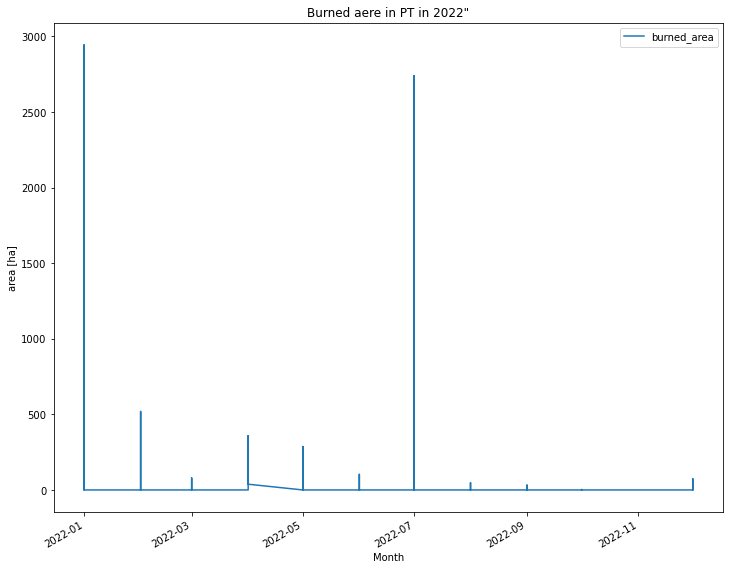

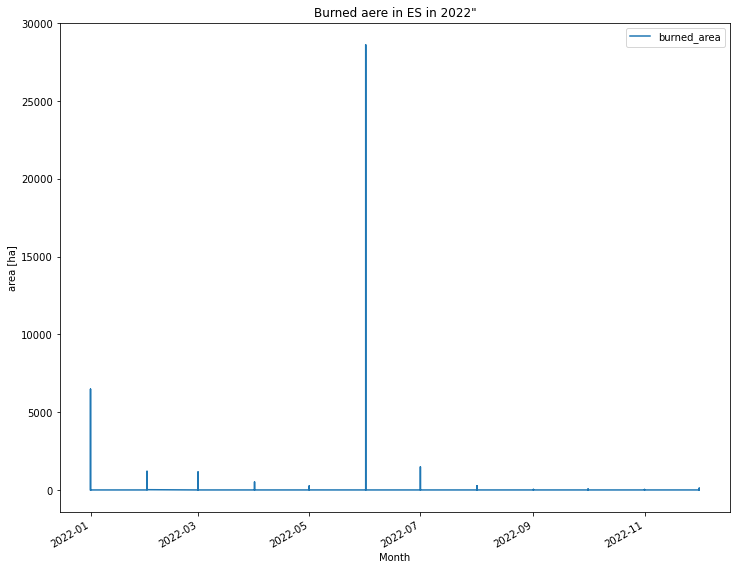

In [34]:
## trend
##https://realpython.com/pandas-plot-python/

df_PT=df_transformed.where(df_transformed.ISO2 == 'PT')
df_PT.plot(x="fire_date", y="burned_area", kind="line",title='Burned aere in PT in 2022"',xlabel="Month",ylabel="area [ha]",figsize=(12, 10))

df_ES=df_transformed.where(df_transformed.ISO2 == 'ES')
df_ES.plot(x="fire_date", y="burned_area", kind="line",title='Burned aere in ES in 2022"',xlabel="Month",ylabel="area [ha]",figsize=(12, 10))
#plt.show()


#df_compare = pd.DataFrame({'speed': speed,'lifespan': lifespan}, index=index





## (6) Trend - times series

In [38]:
#https://ourcodingclub.github.io/tutorials/pandas-time-series/



## (10) Export table // store table on MS-SQL server

### (10.1) Export table // store table on ONAGER MS-SQL server

In [21]:
#
#https://learn.microsoft.com/en-us/sql/machine-learning/data-exploration/python-dataframe-sql-server?view=sql-server-ver16



import pyodbc 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy as sa
from sqlalchemy import create_engine, event
from sqlalchemy.engine.url import URL

        

name_of_table ="wild_fires_2000_2022_light4"

#
print ("connect to engine......")
engine = sa.create_engine('mssql+pyodbc://' + "ONAGER" + '/' + "Climate_Impact" + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')

print ("send table to MS-SQL:")
#df_transformed_light.to_sql(name_of_table, engine, if_exists='replace', index = False, schema='wild_fire')




print ("END...")



connect to engine......
send table to MS-SQL:
END...


In [ ]:
import inspect

configfile = (inspect.getfile(lambda:None))

print(configfile)

In [20]:
### (10.2) Export table // store table on GREENMONKEY MS-SQL server



import pyodbc 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy as sa
from sqlalchemy import create_engine, event
from sqlalchemy.engine.url import URL

        

name_of_table ="wild_fires_2000_2022_light_v4"

#
print ("connect to engine......")
engine = sa.create_engine('mssql+pyodbc://' + "GREENMONKEY" + '/' + "Climate_Impact" + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')

print ("send table to MS-SQL:")
df_transformed_light.to_sql(name_of_table, engine, if_exists='replace', index = False, schema='wild_fire')




print ("END...")


connect to engine......
send table to MS-SQL:


NameError: name 'df_transformed_light' is not defined

## QC of the uploaded data

In [3]:
##Reading data
#cursor = cnxn.cursor()
### SQL query


import pyodbc 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy as sa
from sqlalchemy import create_engine, event
from sqlalchemy.engine.url import URL


print ("Reading table from greenmonkey")
query=('''

SELECT 
iso2
      ,YEAR([fire_date]) as year
      ,sum([burned_area]) as burned_area_ha
  FROM [Climate_Impact].[wild_fire].[wild_fires_2000_2022_light]
 
  left join [LUT].[L_adm_eea39_2021LUT] on [L_adm_eea39_2021LUT].[ADM_ID]= [wild_fires_2000_2022_light].[ADM_ID]
 
  where iso2='PT'
 
  group by iso2, YEAR([fire_date]) order by YEAR([fire_date])


''')
print ("connect to engine......")
engine = sa.create_engine('mssql+pyodbc://' + "GREENMONKEy" + '/' + "Climate_Impact" + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')
df = pd.read_sql(query, engine)
#print(df.head(26))
#pivot 

print ("end.............")

Reading table from greenmonkey
connect to engine......
end.............


In [4]:
DF

NameError: name 'DF' is not defined

In [5]:
df



,iso2,year,burned_area_ha
0,PT,2000,103016
1,PT,2001,74958
2,PT,2002,85886
3,PT,2003,292841
4,PT,2004,130988
5,PT,2005,275434
6,PT,2006,56452
7,PT,2007,15762
8,PT,2008,5359
9,PT,2009,75383


<AxesSubplot:title={'center':'Burned aere in PT in 2022"'}, xlabel='Month', ylabel='area [ha]'>

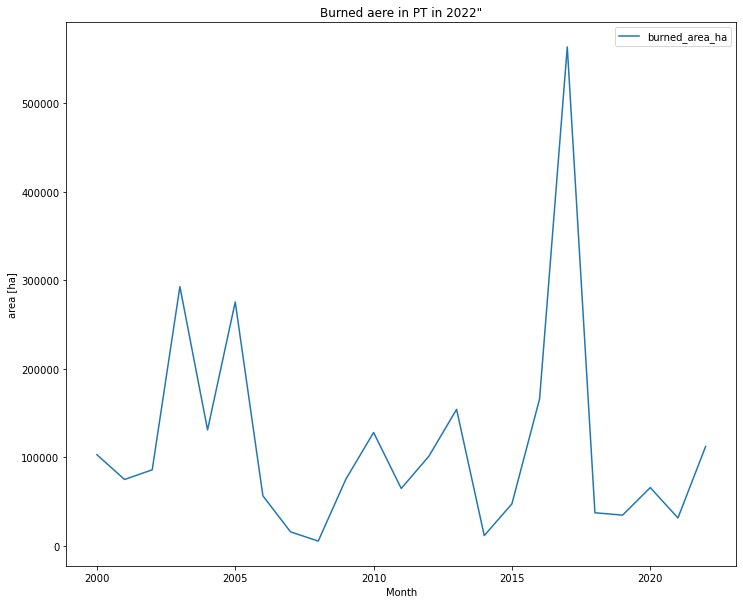

In [10]:
#df_PT=df.where(df.ISO2 == 'PT')
df.plot(x="year", y="burned_area_ha", kind="line",title='Burned aere in PT in 2022"',xlabel="Month",ylabel="area [ha]",figsize=(12, 10))




#df_compare = pd.DataFrame({'speed': speed,'lifespan': lifespan}, index=index


In [14]:
import matplotlib.pyplot as plt
import pandas as pd


x = pd.Series(np.arange(50))
y = pd.Series(10 + (2 * x + np.random.randint(-5, + 5, 50)))
regression = pd.ols(y=y, x=x)
regression.summary

ModuleNotFoundError: No module named 'statsmodels'